In [1]:
import pandas as pd

In [2]:
df5=pd.read_csv('df5.csv')

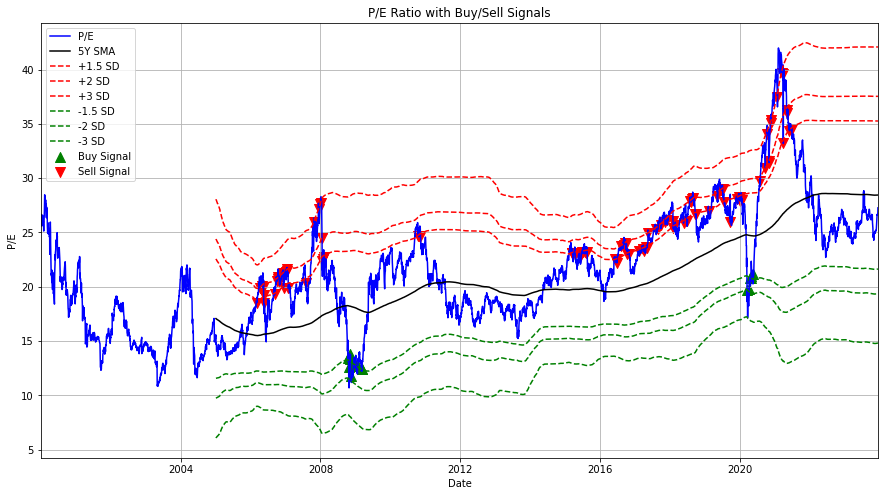

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
df5['Date'] = pd.to_datetime(df5['Date'])
# Assuming df5 is your DataFrame and it's already loaded
# Plotting for df5
plt.figure(figsize=(15, 8))
plt.plot(df5['Date'], df5['P/E'], label='P/E', color='blue')
plt.plot(df5['Date'], df5['SMA_5_Years'], label='5Y SMA', color='black')
plt.plot(df5['Date'], df5['1.5sd_5SMA_POS'], label='+1.5 SD', color='red', linestyle='--')
plt.plot(df5['Date'], df5['2sd_5SMA_POS'], label='+2 SD', color='red', linestyle='--')
plt.plot(df5['Date'], df5['3sd_5SMA_POS'], label='+3 SD', color='red', linestyle='--')
plt.plot(df5['Date'], df5['1.5sd_5SMA_NEG'], label='-1.5 SD', color='green', linestyle='--')
plt.plot(df5['Date'], df5['2sd_5SMA_NEG'], label='-2 SD', color='green', linestyle='--')
plt.plot(df5['Date'], df5['3sd_5SMA_NEG'], label='-3 SD', color='green', linestyle='--')

# Highlighting buy signals with an up triangle marker
buy_signals = df5[df5['signals'].str.contains('B', na=False)]
plt.scatter(buy_signals['Date'], buy_signals['P/E'], marker='^', color='green', s=100, label='Buy Signal')

# Highlighting sell signals with a down triangle marker
sell_signals = df5[df5['signals'].str.contains('S', na=False)]
plt.scatter(sell_signals['Date'], sell_signals['P/E'], marker='v', color='red', s=100, label='Sell Signal')

min_date = df5['Date'].min()
max_date = df5['Date'].max()

# Set x-axis to display years with a specific interval
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().set_xlim(min_date, max_date)  # Set x-axis range to match your data's range


plt.title('P/E Ratio with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('P/E')
plt.legend()
plt.grid(True)
plt.show()
